In [37]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
def jeu_avion(nbr_people):

    # Initialization

    avion = ["-" for i in range(0,nbr_people)]
    places = [i for i in range(0,nbr_people)]

    # First person

    random_place = random.randint(0,nbr_people-1)
    avion[random_place] = places[0]
    del places[0]

    # The others

    for i in places:
        if avion[i] == "-":
            avion[i] = i
        else:
            place_ok = False
            random_place = random.randint(0,nbr_people-1)
            while (place_ok == False):
                if (avion[random_place] == "-"):
                    avion[random_place] = i
                    place_ok = True
                else:
                    random_place = random.randint(0,nbr_people-1)

    # Is the last person at his place?
    return avion[99] == 99

In [28]:
def lot_jeu_avion(nbr_lancer):
    
    game_win = 0
    game_lost = 0

    for i in range(0,nbr_lancer):
        if jeu_avion(100) == True:
            game_win += 1
        else:
            game_lost += 1
    
    return game_win

In [65]:
# Create different samples

sample = [10, 100, 1000, 5000, 10000]
sample_size = len(sample)
win = [lot_jeu_avion(i) for i in sample]
lost = [sample[i] - win[i] for i in range(0, sample_size)]

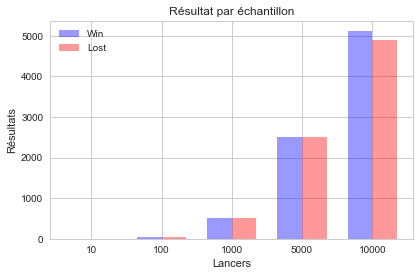

In [66]:
# Plot the samples results

fig, ax = plt.subplots()

index = np.arange(sample_size)
bar_width = 0.35
opacity = 0.4

rects1 = ax.bar(index, win, bar_width, alpha=opacity, color='b', label='Win')
rects2 = ax.bar(index + bar_width, lost, bar_width, alpha=opacity, color='r', label='Lost')

ax.set_xlabel('Lancers')
ax.set_ylabel('Résultats')
ax.set_title('Résultat par échantillon')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(sample)
ax.legend()

fig.tight_layout()
plt.show()